# Predecir la calidad del Vino blanco

En este estudio analizaremos la calidad del vino blanco mediante factores propios del vino como el PH, análisis de azúcar y oxígeno realizados al vino para determinar que tan bueno es dicho vino en una puntuación de 0 a 10. Las muestra de entrenamiento fueron recolectadas de https://archive.ics.uci.edu/ml/datasets/Wine+Quality.

Trabajaremos este estudio mediante las librerías de Pandas para la adquisición y preprocesamiento de datos, Keras para el análisis y aprendizaje y Matplotlib para la graficación.

## Fase de Adquisición de datos

In [2]:
import pandas as pd

url = "http://badillosoft.com/winequality-white.csv"

df = pd.read_csv(url, sep=";")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [3]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

## Fase de inspección de datos

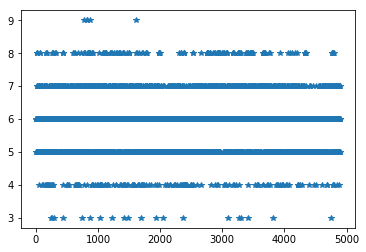

In [6]:
import matplotlib.pyplot as plt

plt.plot(df["quality"].index, df["quality"], "*")

plt.show()

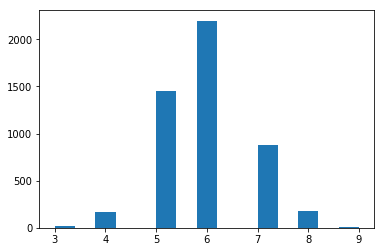

In [10]:
plt.hist(df["quality"], 15)

plt.show()

## Fase de Entrenamiento

In [11]:
# Definimos k como el número de muestras utilizas para el entrenamiento
n = len(df)
k = int(n * 0.9)

print("Se utilizarán {}/{} muestras para el entrenamiento".format(k, n))

Se utilizarán 4408/4898 muestras para el entrenamiento


In [32]:
x_columns = ["fixed acidity", "volatile acidity", 
             "citric acid", "residual sugar",
            "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density",
            "pH", "sulphates", "alcohol"]

x = pd.DataFrame(df, columns=x_columns)

x_train = x[:k].values # [0 -> k - 1] |k| 90%
x_test = x[k:].values # [k -> n - 1] |n - k| 10%

print("Muestras de entrenamiento (características)")
print(x_train)
print("Muestras de validación (características)")
print(x_test)

Muestras de entrenamiento (características)
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 5.9   0.29  0.16 ...  3.21  0.36  9.4 ]
 [ 6.3   0.29  0.29 ...  3.17  0.36 12.8 ]
 [ 6.3   0.19  0.32 ...  2.92  0.47 11.05]]
Muestras de validación (características)
[[ 5.7         0.29        0.16       ...  3.21        0.36
   9.4       ]
 [ 6.3         0.29        0.29       ...  3.17        0.36
  12.8       ]
 [ 5.7         0.24        0.47       ...  3.11        0.46
   9.73333333]
 ...
 [ 6.5         0.24        0.19       ...  2.99        0.46
   9.4       ]
 [ 5.5         0.29        0.3        ...  3.34        0.38
  12.8       ]
 [ 6.          0.21        0.38       ...  3.26        0.32
  11.8       ]]


In [33]:
y = df["quality"]

y_train = y[:k].values
y_test = y[k:].values

print("Muestras de entrenamiento (objetivos)")
print(y_train)
print("Muestras de validación (objetivos)")
print(y_test)

Muestras de entrenamiento (objetivos)
[6 6 6 ... 5 7 6]
Muestras de validación (objetivos)
[5 7 5 7 7 7 7 5 5 6 6 6 6 6 6 6 6 6 6 5 6 6 5 6 6 5 6 6 6 6 5 5 5 6 5 5 6
 6 6 6 5 6 6 5 5 6 6 5 5 5 7 5 6 6 6 6 5 5 5 5 6 6 6 6 5 5 6 6 6 5 5 5 5 5
 6 4 5 6 6 6 6 6 6 6 6 6 6 6 6 5 5 6 6 6 6 7 5 5 6 5 4 5 6 6 6 6 5 6 6 6 6
 6 5 5 6 5 6 6 6 6 6 6 6 6 6 5 6 6 6 5 6 5 6 6 5 5 6 6 6 6 5 5 6 6 6 6 6 5
 5 6 6 7 6 6 7 7 7 5 5 5 6 6 6 7 7 6 7 7 5 6 7 6 6 6 6 6 6 6 6 6 5 6 6 6 6
 6 6 6 6 6 6 7 6 6 6 6 6 6 5 6 7 4 6 5 5 5 5 7 5 7 7 5 6 7 7 6 6 5 6 6 6 7
 7 7 6 6 6 6 5 6 5 6 6 6 7 6 6 7 7 7 5 5 5 7 5 7 7 7 7 7 6 6 6 5 6 7 7 6 5
 7 7 5 6 5 5 7 7 6 6 7 6 5 4 6 6 6 6 5 4 6 6 6 6 7 5 6 7 7 6 7 6 5 5 6 6 7
 6 6 7 6 6 6 7 6 6 6 7 6 6 6 6 6 5 6 6 6 6 6 6 6 6 5 5 6 6 6 6 6 6 7 6 6 5
 6 6 5 5 3 6 6 5 6 5 6 7 6 6 6 7 7 6 6 6 6 7 7 6 8 8 7 6 6 6 6 5 7 4 6 6 6
 6 4 5 5 6 6 5 7 8 8 5 6 6 6 6 6 5 7 7 6 5 6 7 7 8 7 4 6 6 6 5 6 5 6 7 5 6
 7 6 6 6 6 5 6 6 7 5 6 6 6 5 7 6 6 5 6 7 6 5 6 6 4 7 6 6 5 6 5 6 7 6 5 6 5
 5 5 6 6 

In [44]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

#model.add(Dense(units=6, activation="tanh", input_dim=11))
model.add(Dense(units=1, activation="relu", input_dim=11))
# 11 -> 6 -> 1

model.compile(optimizer="adam", loss="logcosh",
              metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
4408/4408 [==============================] - 1s 178us/step - loss: 11.9387 - acc: 0.0227
Epoch 2/100
4408/4408 [==============================] - 0s 51us/step - loss: 4.0426 - acc: 0.0647
Epoch 3/100
4408/4408 [==============================] - 0s 76us/step - loss: 3.2313 - acc: 0.0737
Epoch 4/100
4408/4408 [==============================] - 0s 55us/step - loss: 3.1313 - acc: 0.0780
Epoch 5/100
4408/4408 [==============================] - 0s 43us/step - loss: 3.0019 - acc: 0.0824
Epoch 6/100
4408/4408 [==============================] - 0s 75us/step - loss: 2.8470 - acc: 0.0951
Epoch 7/100
4408/4408 [==============================] - 0s 68us/step - loss: 2.6601 - acc: 0.1041
Epoch 8/100
4408/4408 [==============================] - 0s 54us/step - loss: 2.4399 - acc: 0.1075
Epoch 9/100
4408/4408 [==============================] - 0s 59us/step - loss: 2.1913 - acc: 0.1250
Epoch 10/100
4408/4408 [==============================] - 0s 68us/step - loss: 1.9081 - acc: 0.1397
Epoch 1

4408/4408 [==============================] - 0s 57us/step - loss: 0.2394 - acc: 0.5039
Epoch 83/100
4408/4408 [==============================] - 0s 66us/step - loss: 0.2399 - acc: 0.5118: 0s - loss: 0.2367 - acc: 0.5
Epoch 84/100
4408/4408 [==============================] - 0s 94us/step - loss: 0.2396 - acc: 0.5098
Epoch 85/100
4408/4408 [==============================] - 0s 72us/step - loss: 0.2405 - acc: 0.5095
Epoch 86/100
4408/4408 [==============================] - 0s 55us/step - loss: 0.2383 - acc: 0.5123
Epoch 87/100
4408/4408 [==============================] - 0s 49us/step - loss: 0.2378 - acc: 0.5134
Epoch 88/100
4408/4408 [==============================] - 0s 49us/step - loss: 0.2384 - acc: 0.5134
Epoch 89/100
4408/4408 [==============================] - 0s 40us/step - loss: 0.2426 - acc: 0.5098
Epoch 90/100
4408/4408 [==============================] - 0s 81us/step - loss: 0.2399 - acc: 0.5095
Epoch 91/100
4408/4408 [==============================] - 0s 67us/step - loss: 0.24

In [38]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
metrics = model.evaluate(x_test, y_test, batch_size=64)

print(metrics)

490/490 [==============================] - 0s 459us/step
[0.19305439743460442, 0.5183673462089227]


In [48]:
y_predict = model.predict(x_test).reshape(-1)

print(y_predict)
print(y_test)

[5.488691  6.689885  5.552779  6.9499335 6.359552  6.9499335 6.359552
 5.438483  5.559606  5.8225913 5.5405    5.5405    5.5405    5.5405
 5.8225913 5.8225913 5.5405    5.7469153 5.73884   5.6477404 6.3393207
 6.1198463 5.3234267 6.7612205 6.6783013 5.340651  6.044811  6.277629
 6.4541335 6.284456  5.9780965 5.22059   5.37652   6.560119  5.37652
 5.22059   6.189338  6.189338  6.745411  6.3120546 5.745851  6.2688546
 6.003016  5.5822616 5.5312552 6.3120546 5.599047  5.5830812 5.5830812
 5.5830812 6.6853213 5.7567406 5.599047  5.8834667 6.854543  6.4886084
 5.6169715 5.6169715 6.0967507 5.9004774 6.2798595 6.08979   6.563418
 6.585214  6.0129194 5.247832  5.9899087 6.789325  6.834843  5.6310678
 5.6310678 4.8639956 7.3472705 5.6310678 6.552567  5.281031  4.863431
 6.623718  5.704147  6.414089  6.5372386 6.5372386 6.256126  6.8332334
 6.722323  6.056163  6.167695  6.393704  6.167695  5.460584  6.0518565
 6.4647293 6.0560327 5.9204917 6.1820335 7.2005916 5.7953706 5.8847404
 6.367457  6.56

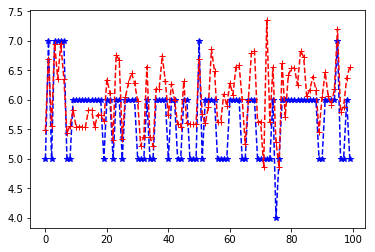

In [55]:
import numpy as np

plt.plot(np.arange(n - k)[:100], y_test[:100], "*--", color="blue")
plt.plot(np.arange(n - k)[:100], y_predict[:100], "+--", color="red")

plt.show()

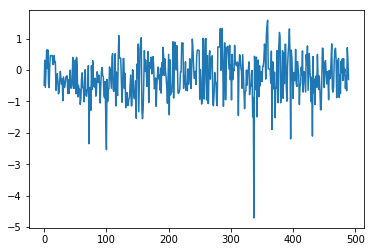

In [57]:
d = y_test - y_predict

plt.plot(np.arange(n - k), d)

plt.show()

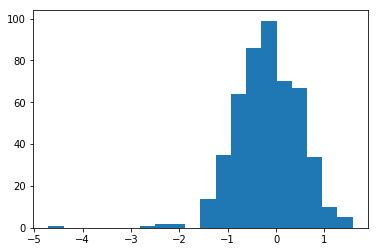

In [62]:
plt.hist(d, 20)

plt.show()

In [65]:
mu = sum(d) / len(d)
s = (sum((d - np.ones(len(d)) * mu) ** 2) / (len(d) - 1)) ** 0.5

print("Media: {}".format(mu))
print("D. Estándar: {}".format(s))

Media: -0.185565953352
D. Estándar: 0.668492874948


In [68]:
tmin = mu - 2 * s
tmax = mu + 2 * s

print("Intervalo de confianza: ({}, {})".format(tmin, tmax))

Intervalo de confianza: (-0.8540588283, 0.482926921596)
